In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/bank_data.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('Exited')
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('encoder', OrdinalEncoder())
])
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['RowNumber', 'CustomerId', 'CreditScore',
                                  'Age', 'Tenure', 'Balance', 'NumOfProducts',
                                  'HasCrCard', 'IsActiveMember',
                                  'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['Surname', 'Geography', 'Gender'])])

In [5]:
X = df.drop('Exited', axis=1)
y = df['Exited']
X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. sequential ann

In [6]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
tf.__version__

'2.15.0'

In [7]:
X_train.shape

(8000, 13)

In [8]:
model =  tf.keras.models.Sequential()
# 1st hidden layer (+ input layer)
model.add(
    tf.keras.layers.Dense(units=6, activation='relu', input_dim=X_train.shape[1])
)
# 2nd hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 
# sigmoid activation function for binary classification
# softmax for multi-class classification
# linear for regression

# compile model
model.compile(
    optimizer='adam', # gradient descent algorithm - Adam is the best
    loss='binary_crossentropy',
)
# bimary_crossentropy for binary classification
# categorical_crossentropy for multi-class classification
# mean_squared_error for regression

# summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
epochs = 100  # Total number of training iterations (epochs)
batch_size = 8  # Number of samples processed in each training step (batch)
patience=10
# Early Stopping Callback Configuration
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=patience,  # Stop training if validation loss doesn't improve for 'patience' epochs
)

# Model Training with Early Stopping
history = model.fit(
    X_train,                # Feature matrix (training data)
    y_train,                # Target vector (training labels)
    validation_split=0.2,   # Split 20% of training data for validation
    epochs=epochs,          # Number of training epochs (iterations)
    batch_size=batch_size,  # Batch size for training
    callbacks=[es],         # Include early stopping callback
    verbose=1               # Display training progress (1 for detailed output)
)

Epoch 1/100
800/800 [==============================] - 1s 564us/step - loss: 20.0065 - val_loss: 0.4854
Epoch 2/100
800/800 [==============================] - 0s 444us/step - loss: 0.6623 - val_loss: 0.6501
Epoch 3/100
800/800 [==============================] - 0s 441us/step - loss: 0.5938 - val_loss: 0.4597
Epoch 4/100
800/800 [==============================] - 0s 435us/step - loss: 0.6672 - val_loss: 0.6176
Epoch 5/100
800/800 [==============================] - 0s 433us/step - loss: 0.6824 - val_loss: 0.4607
Epoch 6/100
800/800 [==============================] - 0s 430us/step - loss: 0.6361 - val_loss: 0.5078
Epoch 7/100
800/800 [==============================] - 0s 473us/step - loss: 0.5949 - val_loss: 0.7375
Epoch 8/100
800/800 [==============================] - 0s 436us/step - loss: 0.6098 - val_loss: 0.7208
Epoch 9/100
800/800 [==============================] - 0s 434us/step - loss: 0.6588 - val_loss: 0.7560
Epoch 10/100
800/800 [==============================] - 0s 443us/step - 

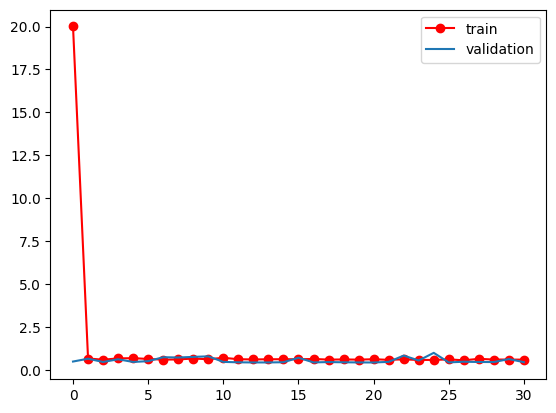

In [11]:
# visualize training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train', marker='o', color='r')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 438us/step - loss: 0.4445


0.44450855255126953

In [13]:
# save the model to disk
model.save('model_v1.h5') # creates a HDF5 file 'model_v1.h5'

In [14]:
# save weights to disk
model.save_weights('model_weights_v1.h5') # creates a HDF5 file 'model_weights_v1.h5'


In [15]:
# load the model from disk
model = tf.keras.models.load_model('model_v1.h5')

In [16]:
# load weights from disk
# declare the model as you did before
# model =  tf.keras.models.Sequential()
# model.add(...)
# model.compile(...)
# model.load_weights('model_weights_v1.h5')

In [17]:
# predict   
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # convert probabilities to binary values
print(y_pred)

63/63 [==============================] - 0s 324us/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
